In [33]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from functools import partial

## Importing Data

First, we import the data and split it in a train and test set. We further split the training data of the fashion_mnist dataset into a validation and training set.

In [8]:
(X_traincif, y_traincif), (X_testcif, y_testcif) = cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## MLP implementation

In this section, we use a sequential model on the fashion_mnist dataset.

### Original model from book

The following code comes from the textbook, we will use this model as a starting point. Later, we will try different hyperparameters for this model.

In [11]:
model = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2248 - accuracy: 0.9195 - val_loss: 0.3097 - val_accuracy: 0.8910
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2208 - accuracy: 0.9202 - val_loss: 0.3222 - val_accuracy: 0.8774
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2167 - accuracy: 0.9211 - val_loss: 0.3114 - val_accuracy: 0.8914
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2139 - accuracy: 0.9229 - val_loss: 0.3096 - val_accuracy: 0.8912
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2103 - accuracy: 0.9245 - val_loss: 0.3036 - val_accuracy: 0.8850
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2072 - accuracy: 0.9243 - val_loss: 0.2964 - val_accuracy: 0.8940
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2030 - accuracy: 0.9270 - val_loss: 0.2964 - val_accuracy:

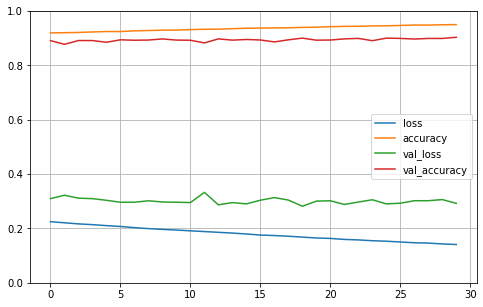

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

As can be seen, the performance is not that great yet. So, we will change some hyperparameters to see how this influences the performance.

### Hyperparameter testing/tuning

In [22]:
# Extra layers
model2 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

# softplus
model3 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="softplus"),
 keras.layers.Dense(100, activation="softplus"),
 keras.layers.Dense(10, activation="softmax")
])

# tanh and L1
model4 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="tanh", kernel_regularizer='l1'),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

# sigmoid and dropout
model5 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="sigmoid"),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(100, activation="sigmoid"),
 keras.layers.Dense(10, activation="softmax")
])

# L1 and L2
model6 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu", kernel_regularizer='l2'),
 keras.layers.Dense(100, activation="relu", kernel_regularizer='l1'),
 keras.layers.Dense(10, activation="softmax")
])

# L1L2
model7 = Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu", kernel_regularizer='l1_l2'),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [25]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model3.compile(loss="sparse_categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])
model4.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
model5.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.5), metrics=["accuracy"])
model6.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])
model7.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

In [31]:
history2 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history3 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history4 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history5 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history6 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history7 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0131 - accuracy: 0.9970 - val_loss: 0.5373 - val_accuracy: 0.8998
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0117 - accuracy: 0.9978 - val_loss: 0.5250 - val_accuracy: 0.9012
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 0.5527 - val_accuracy: 0.8978
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0106 - accuracy: 0.9981 - val_loss: 0.5433 - val_accuracy: 0.8968
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0084 - accuracy: 0.9989 - val_loss: 0.5286 - val_accuracy: 0.9004
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0117 - accuracy: 0.9976 - val_loss: 0.5320 - val_accuracy: 0.8998
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0091 - accuracy: 0.9986 - val_loss: 0.5326 - val_accuracy:

Epoch 24/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6526 - val_accuracy: 0.9000
Epoch 25/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6495 - val_accuracy: 0.9008
Epoch 26/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6521 - val_accuracy: 0.9000
Epoch 27/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6557 - val_accuracy: 0.9010
Epoch 28/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6505 - val_accuracy: 0.8992
Epoch 29/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6537 - val_accuracy: 0.8996
Epoch 30/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6538 - val_ac

In [44]:
print('Validation accuracies at final epoch of each model: ')
for x in [history, history2, history3, history4, history5, history6, history7]:
    print(x.history['val_accuracy'][-1])

Validation accuracies at final epoch of each model: 
0.9034000039100647
0.9021999835968018
0.8988000154495239
0.8999999761581421
0.9010000228881836
0.9002000093460083
0.8998000025749207


## CNN implementation

Next, we use a CNN on the same dataset and try out different parameters

### Original model from book

The below code shows the original model as described in the textbook. Just like before, this model is used as the base model. Using this model, we will try different hyperparameters.

In [34]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [35]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [37]:
cnnhis = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2363s 1s/step - loss: 1.2661 - accuracy: 0.5218 - val_loss: 0.7139 - val_accuracy: 0.7312
Epoch 2/10
1719/1719 [==============================] - 211s 123ms/step - loss: 0.8374 - accuracy: 0.6877 - val_loss: 0.5553 - val_accuracy: 0.7816
Epoch 3/10
1719/1719 [==============================] - 203s 118ms/step - loss: 0.6975 - accuracy: 0.7448 - val_loss: 0.4867 - val_accuracy: 0.8122
Epoch 4/10
1719/1719 [==============================] - 206s 120ms/step - loss: 0.6128 - accuracy: 0.7771 - val_loss: 0.4287 - val_accuracy: 0.8432
Epoch 5/10
1719/1719 [==============================] - 197s 115ms/step - loss: 0.5570 - accuracy: 0.8030 - val_loss: 0.3967 - val_accuracy: 0.8596
Epoch 6/10
1719/1719 [==============================] - 203s 118ms/step - loss: 0.5161 - accuracy: 0.8173 - val_loss: 0.3785 - val_accuracy: 0.8582
Epoch 7/10
1719/1719 [==============================] - 209s 122ms/step - loss: 0.4883 - accuracy: 0.8290 - val_lo

### Hyperparameter testing/tuning

## Testing best models on different dataset